<a href="https://colab.research.google.com/github/umm-e-sulaim/machine-learning-AI/blob/main/Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# prompt: load the libs for eda

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Additional libraries you might find useful for EDA
# import missingno as msno  # For visualizing missing data
# import scipy.stats as stats # For statistical tests

# Set display options for pandas (optional)
pd.set_option('display.max_columns', None) # Display all columns
pd.set_option('display.max_rows', None) # Display all rows
pd.set_option('display.expand_frame_repr', False) # Prevent wrapping of long dataframes
# pd.set_option('display.float_format', '{:.2f}'.format) # Set precision for floats


OptionError: No such keys(s): '/fifa_eda.csv'

In [5]:
# prompt: load the csv file

import pandas as pd
# Assuming the CSV file is named 'your_file.csv' in the current directory
# If it's in a different location, provide the full path

try:
  df = pd.read_csv('/fifa_eda.csv')
  print(df.head()) # Display the first few rows of the dataframe
except FileNotFoundError:
  print("Error: 'your_file.csv' not found. Please ensure the file exists and the path is correct.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


       ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    

In [6]:
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

In [7]:
# prompt: find missing values and duplicate values from the given file

# Find missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Find duplicate rows
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)


Missing Values:
 ID                            0
Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [ID, Name, Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Skill Moves, Position, Joined, Contract Valid Until, Height, Weight, Release Clause]
Index: []


In [8]:
# prompt: clean all the missing values and duplicate valueas

# Drop rows with any missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display info of the cleaned DataFrame
df_cleaned.info()

# Display descriptive statistics of the cleaned DataFrame
df_cleaned.describe()

# Display first few rows of the cleaned DataFrame
df_cleaned.head()


<class 'pandas.core.frame.DataFrame'>
Index: 17907 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17907 non-null  int64  
 1   Name                      17907 non-null  object 
 2   Age                       17907 non-null  int64  
 3   Nationality               17907 non-null  object 
 4   Overall                   17907 non-null  int64  
 5   Potential                 17907 non-null  int64  
 6   Club                      17907 non-null  object 
 7   Value                     17907 non-null  float64
 8   Wage                      17907 non-null  float64
 9   Preferred Foot            17907 non-null  object 
 10  International Reputation  17907 non-null  float64
 11  Skill Moves               17907 non-null  float64
 12  Position                  17907 non-null  object 
 13  Joined                    17907 non-null  int64  
 14  Contract Va

ID               Name  Age Nationality  Overall  Potential  \
0  158023           L. Messi   31   Argentina       94         94   
1   20801  Cristiano Ronaldo   33    Portugal       94         94   
2  190871          Neymar Jr   26      Brazil       92         93   
3  193080             De Gea   27       Spain       91         93   
4  192985       K. De Bruyne   27     Belgium       91         92   

                  Club     Value   Wage Preferred Foot  \
0         FC Barcelona  110500.0  565.0           Left   
1             Juventus   77000.0  405.0          Right   
2  Paris Saint-Germain  118500.0  290.0          Right   
3    Manchester United   72000.0  260.0          Right   
4      Manchester City  102000.0  355.0          Right   

   International Reputation  Skill Moves Position  Joined  \
0                       5.0          4.0       RF    2004   
1                       5.0          5.0       ST    2018   
2                       5.0          5.0       LW    2017   
3                       4.0          1.0       GK    2011   
4                       4.0          4.0      RCM    2015   

  Contract Valid Until    Height  Weight  Release Clause  
0           2021-01-01  5.583333   159.0        226500.0  
1           2022-01-01  6.166667   183.0        127100.0  
2           2022-01-01  5.750000   150.0        228100.0  
3           2020-01-01  6.333333   168.0        138600.0  
4           2023-01-01  5.916667   154.0        196400.0

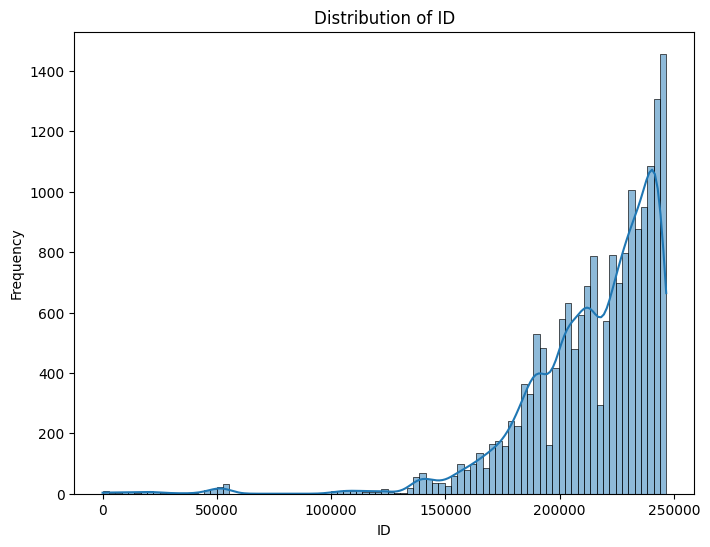

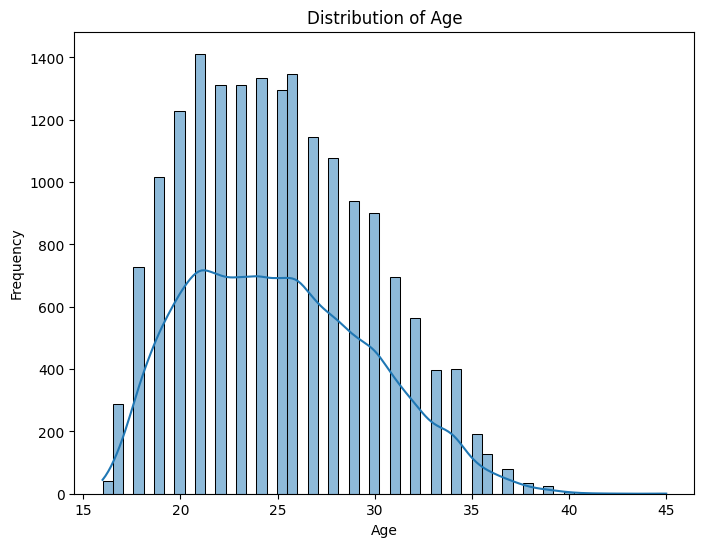

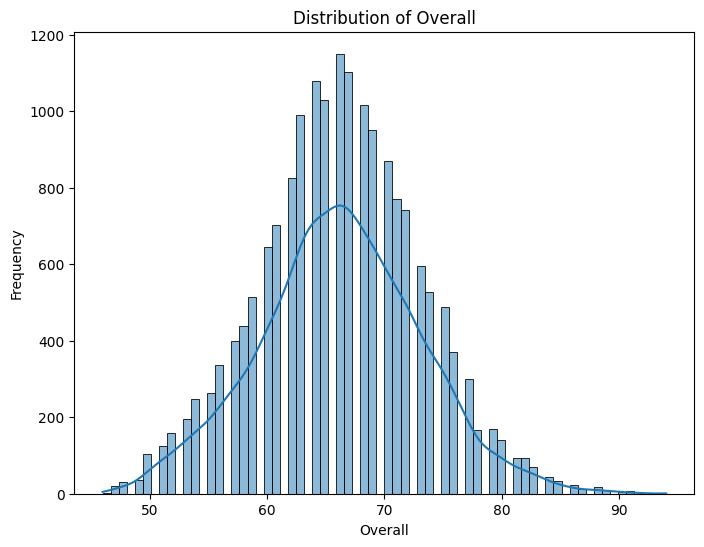

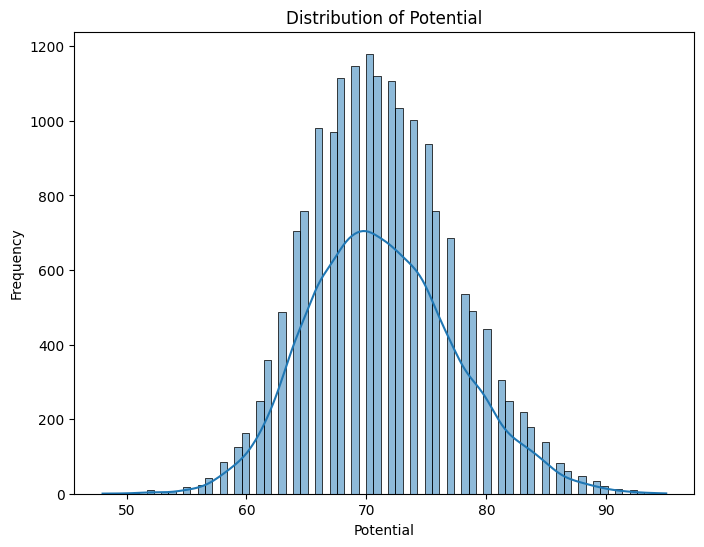

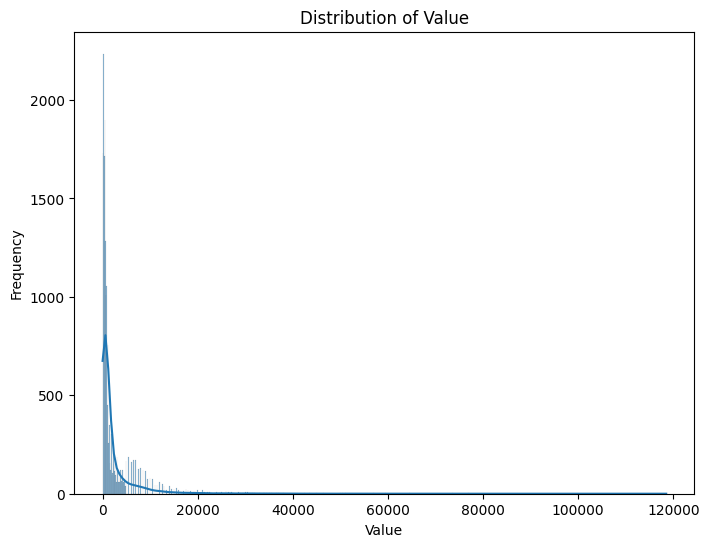

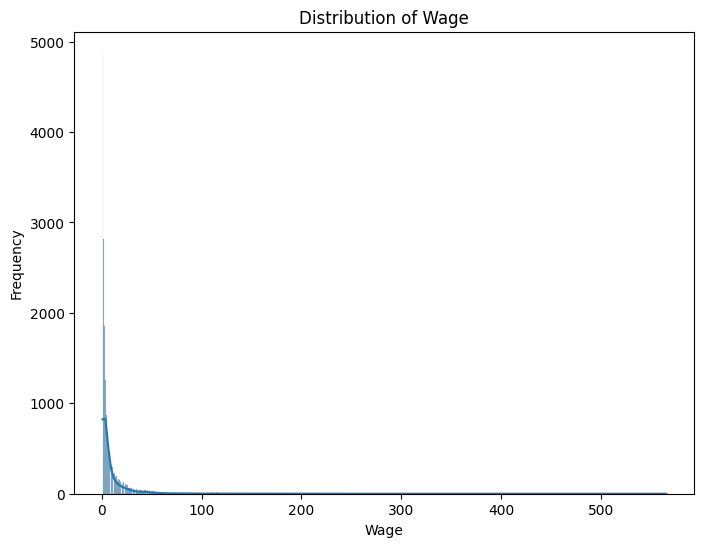

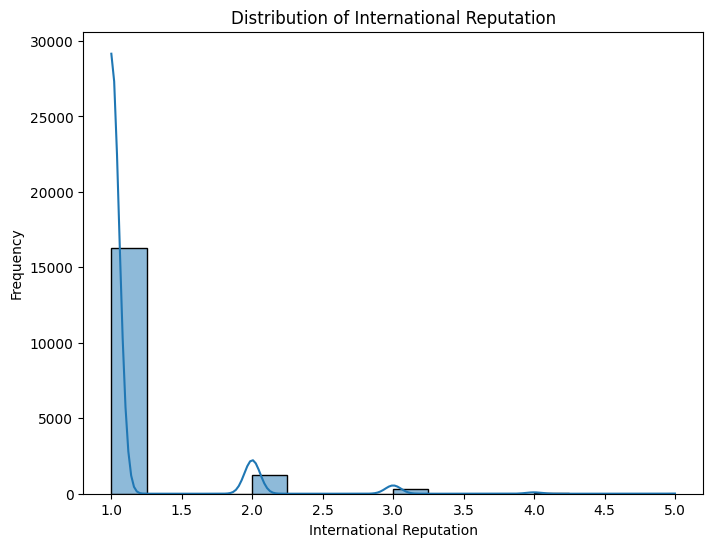

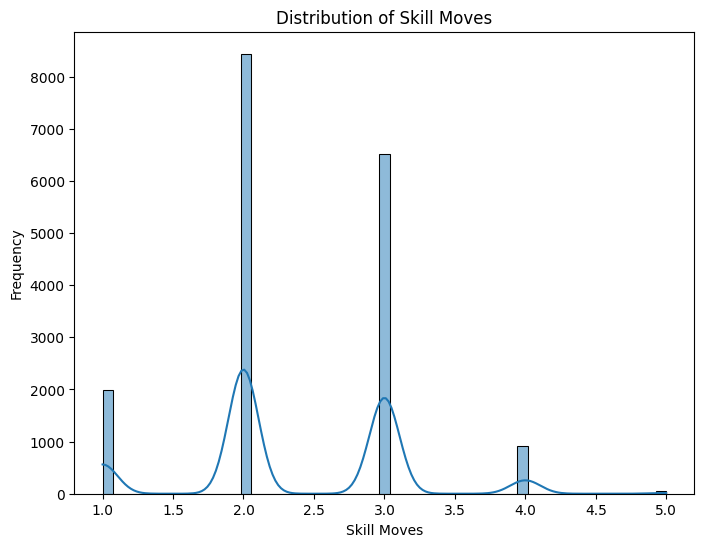

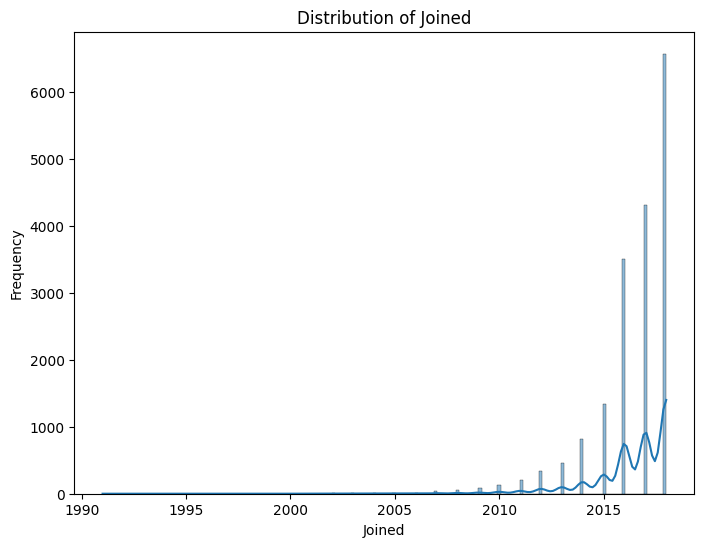

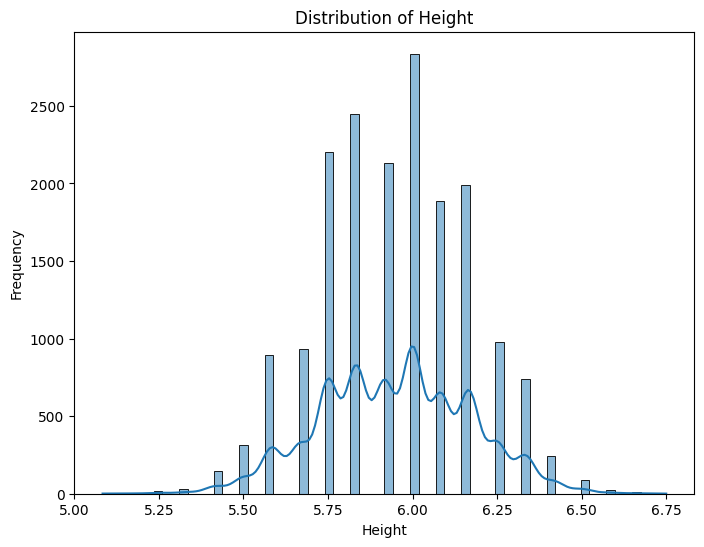

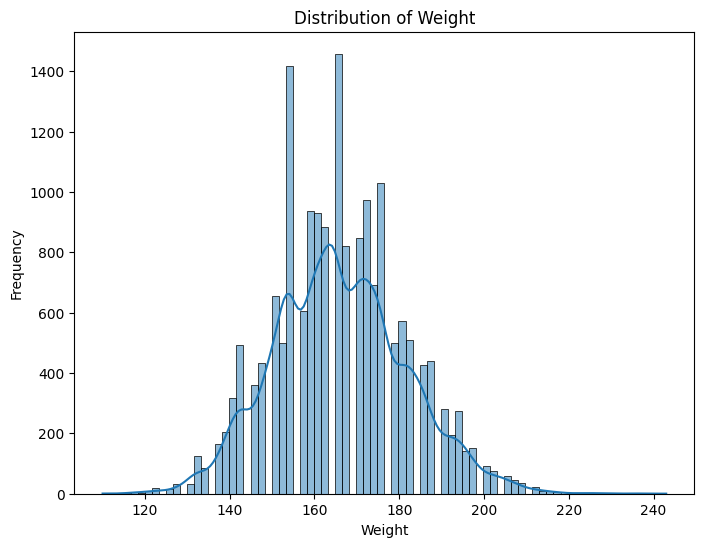

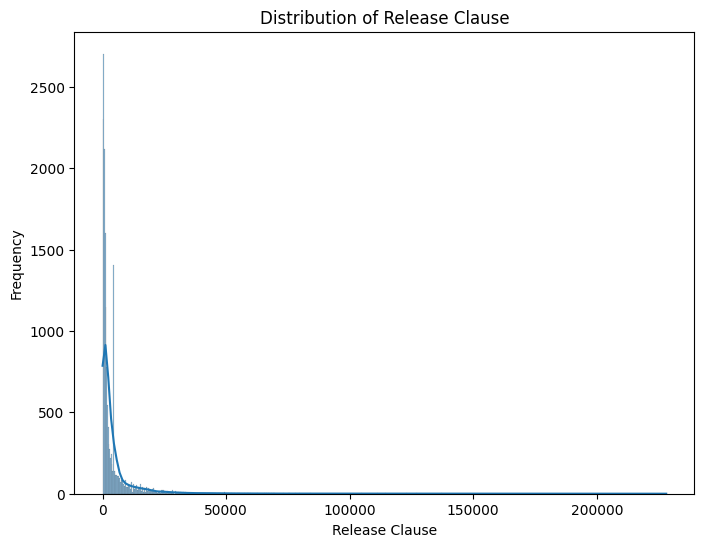

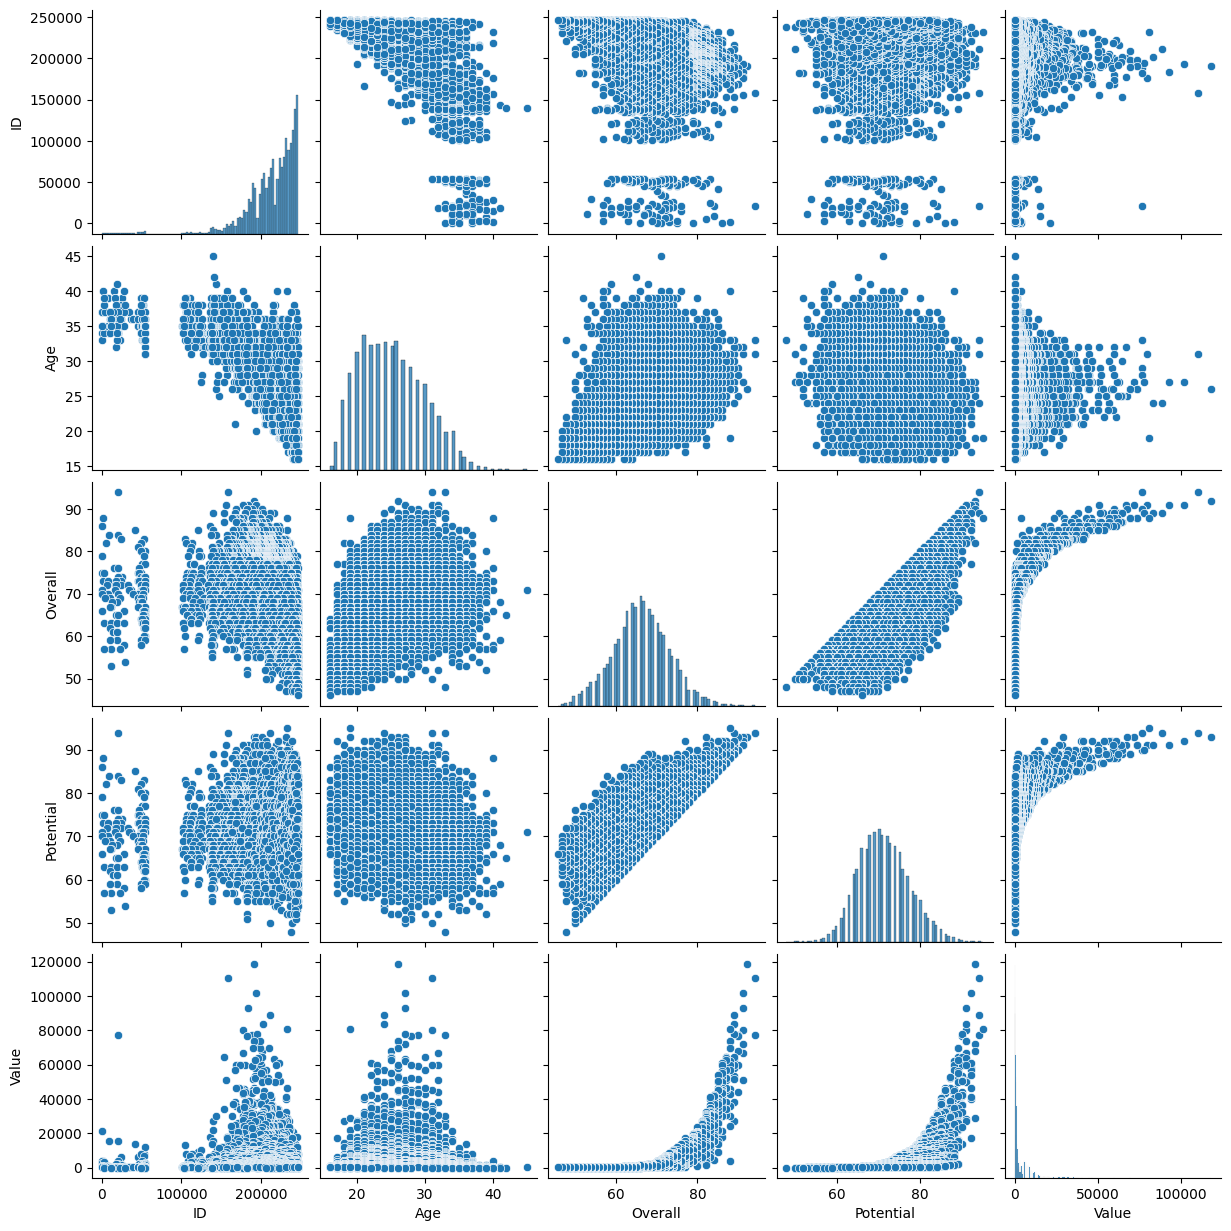

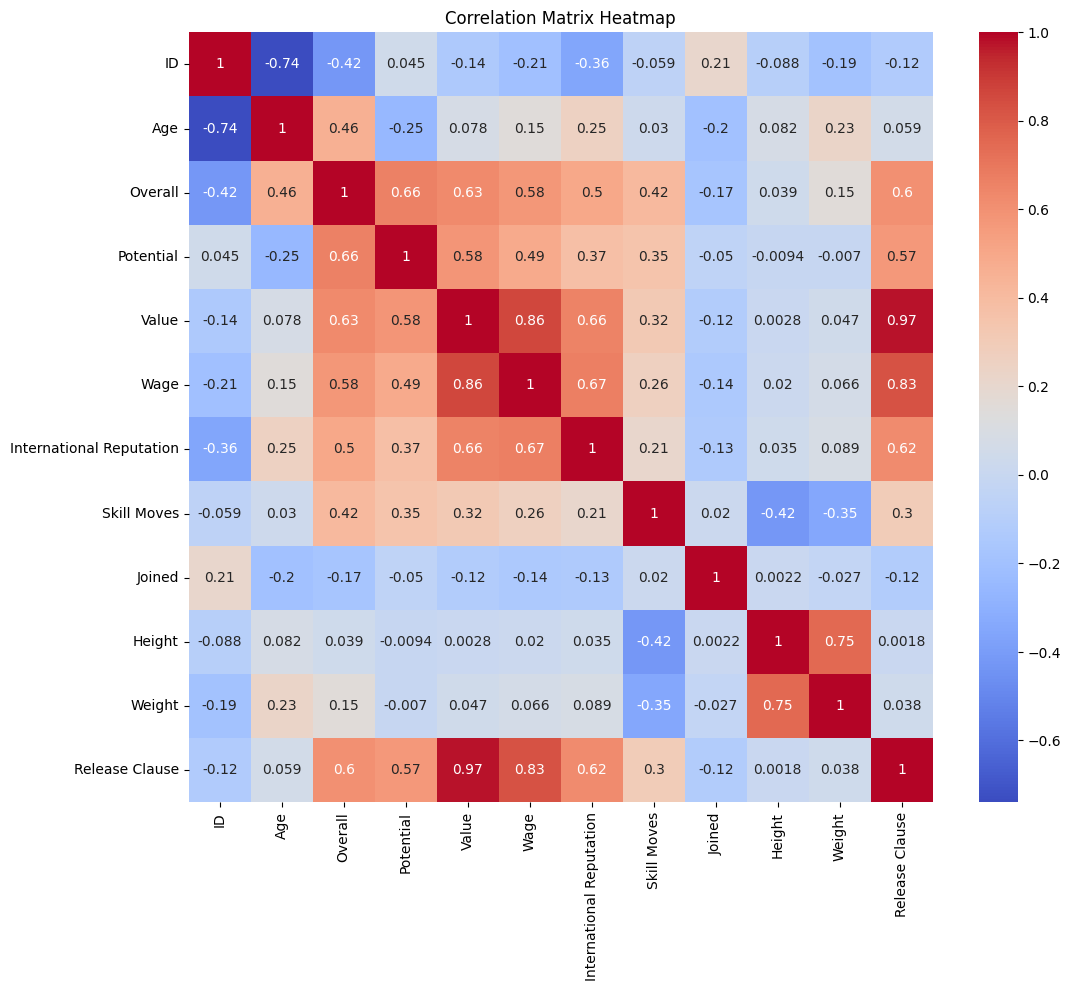

ValueError: Could not interpret value `feature1` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>

In [9]:
# prompt: visualizated the data

import matplotlib.pyplot as plt
import numpy as np
# Visualize the distribution of numerical features
numerical_features = df_cleaned.select_dtypes(include=np.number)
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Visualize the relationship between pairs of numerical features
sns.pairplot(df_cleaned[numerical_features.columns[:5]]) # You can adjust the number of features
plt.show()


# Create a correlation matrix heatmap
correlation_matrix = df_cleaned[numerical_features.columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Example: Visualize the relationship between two specific features (replace 'feature1' and 'feature2')
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature1', y='feature2', data=df_cleaned)
plt.title('Scatterplot of Feature1 vs Feature2')
plt.show()

# Boxplots for numerical features grouped by a categorical feature
categorical_feature = 'CategoryColumn' # Replace 'CategoryColumn' with the name of your categorical column
for col in numerical_features.columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=categorical_feature, y=col, data=df_cleaned)
  plt.title(f'Boxplot of {col} grouped by {categorical_feature}')
  plt.show()

# Countplots for categorical features
categorical_features = df_cleaned.select_dtypes(include='object')
for col in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df_cleaned)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
    plt.show()


Error: 'fifa_eda.csv' not found. Please ensure the file exists and the path is correct.


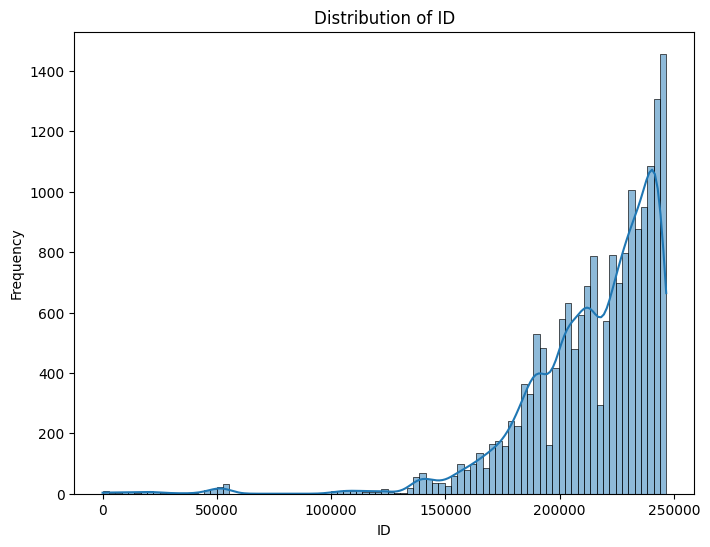

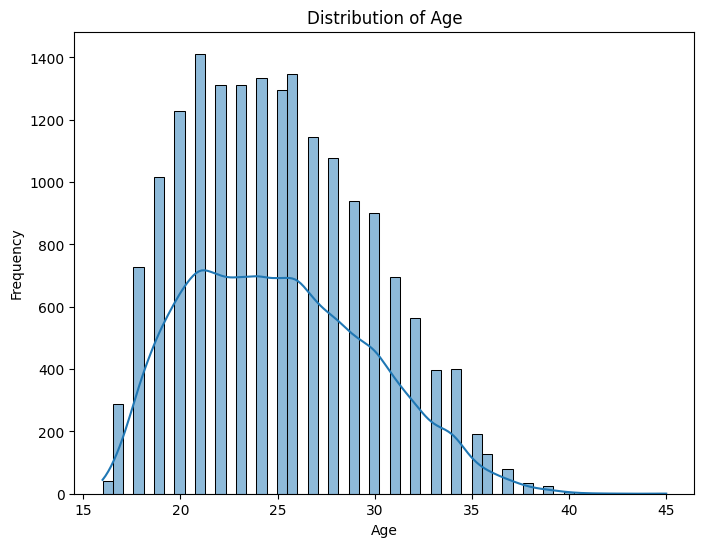

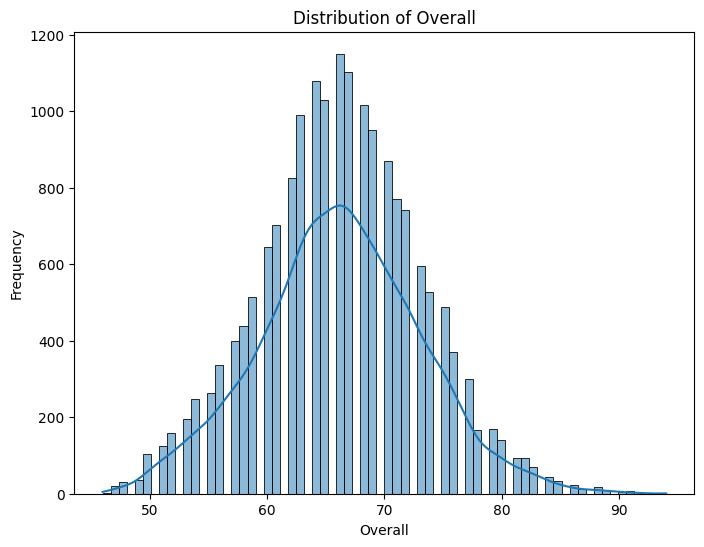

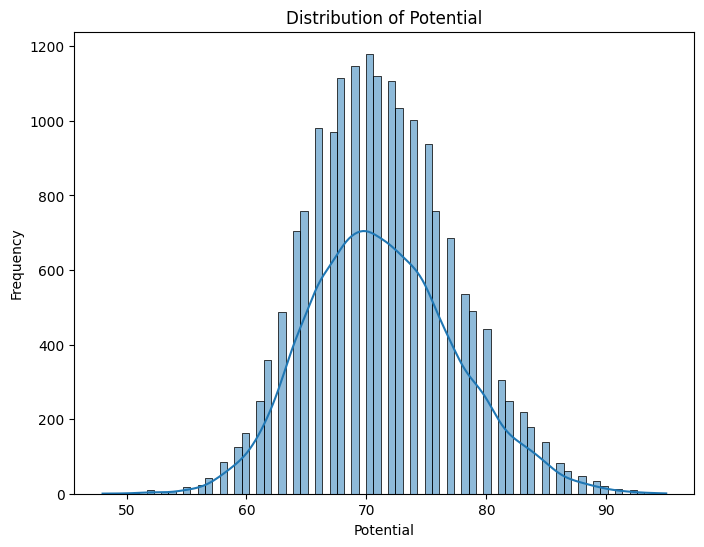

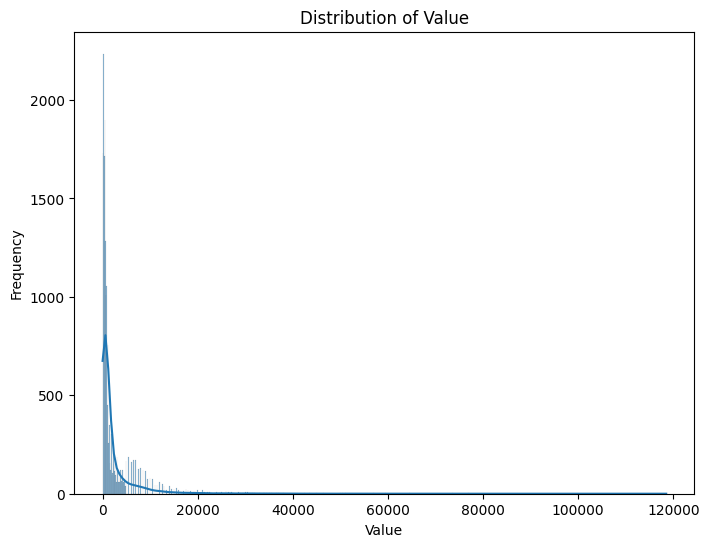

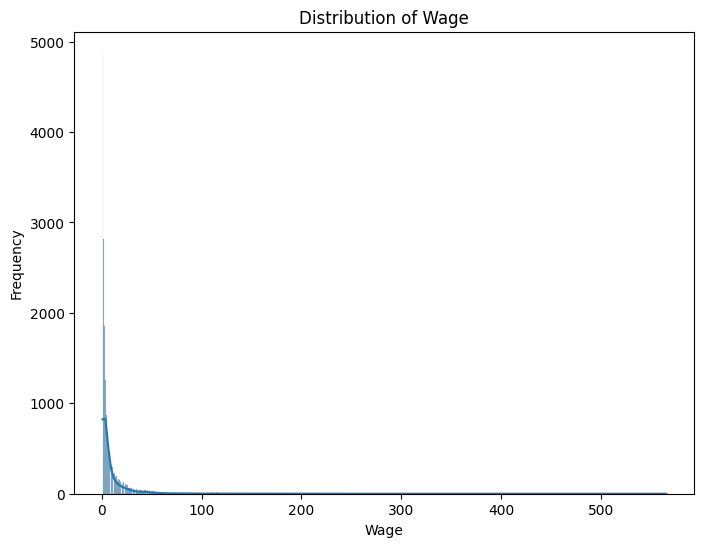

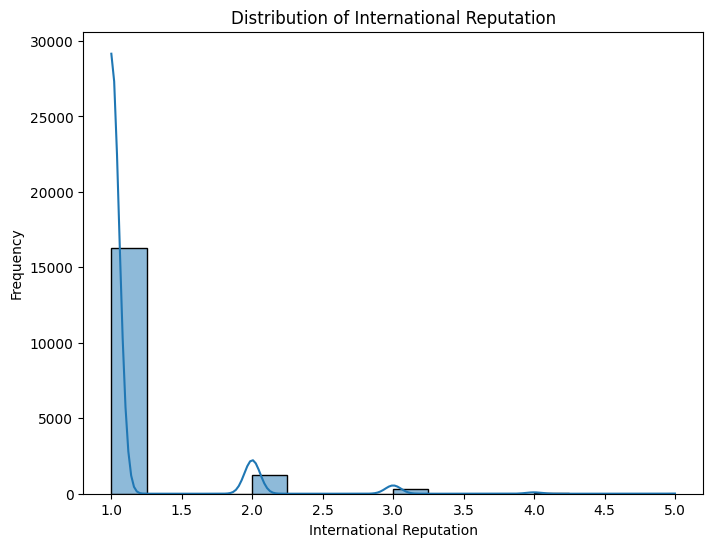

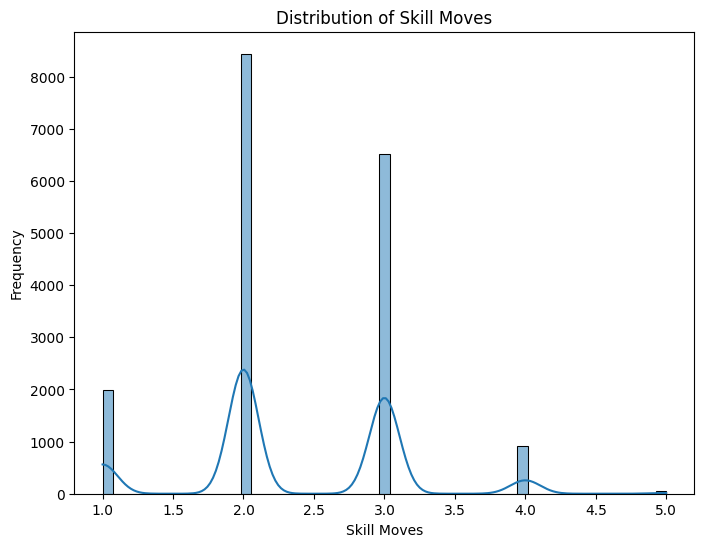

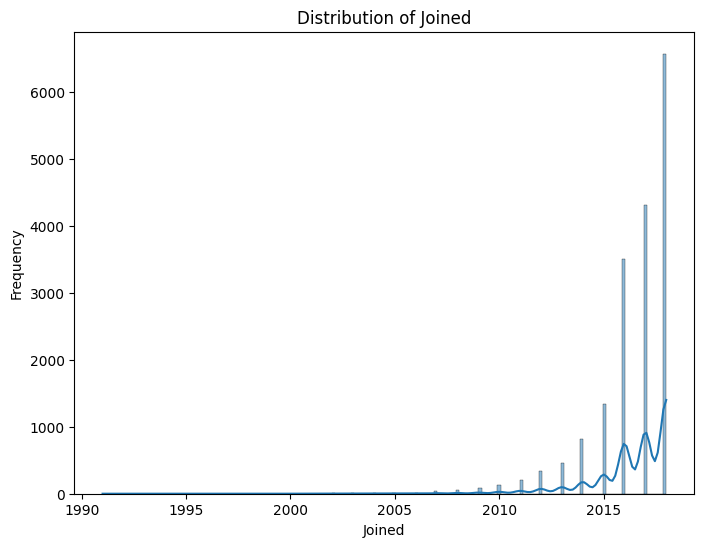

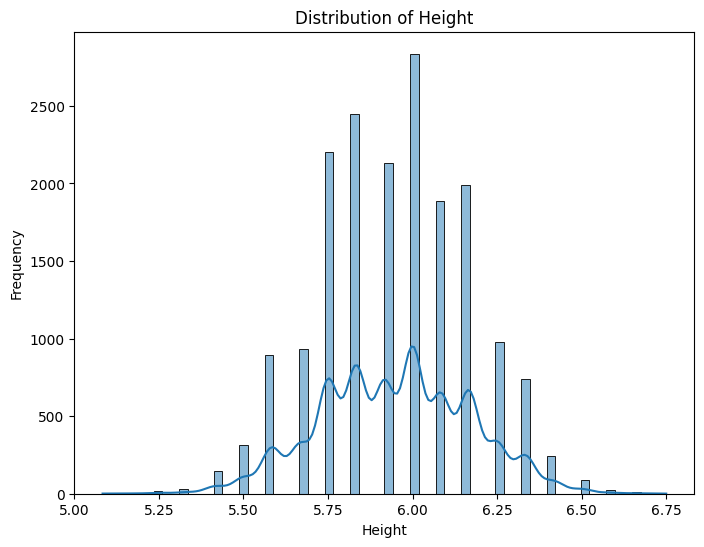

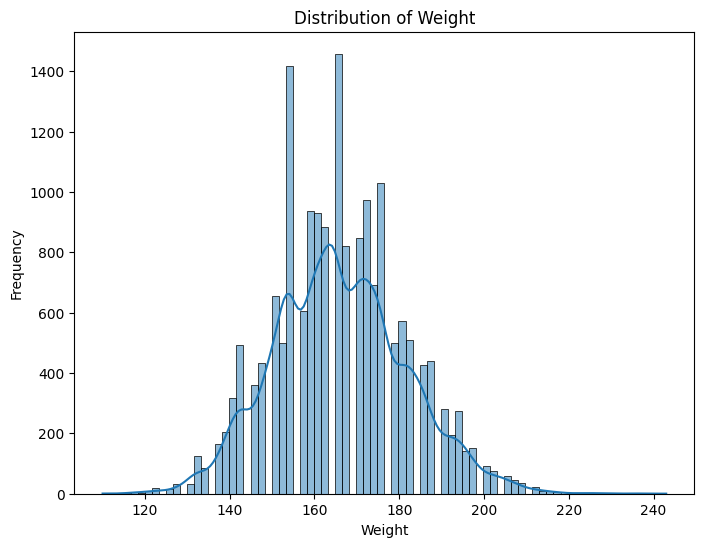

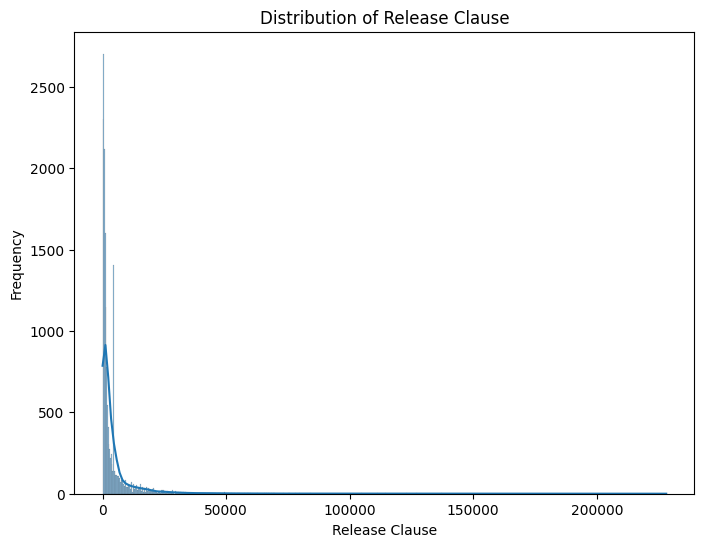

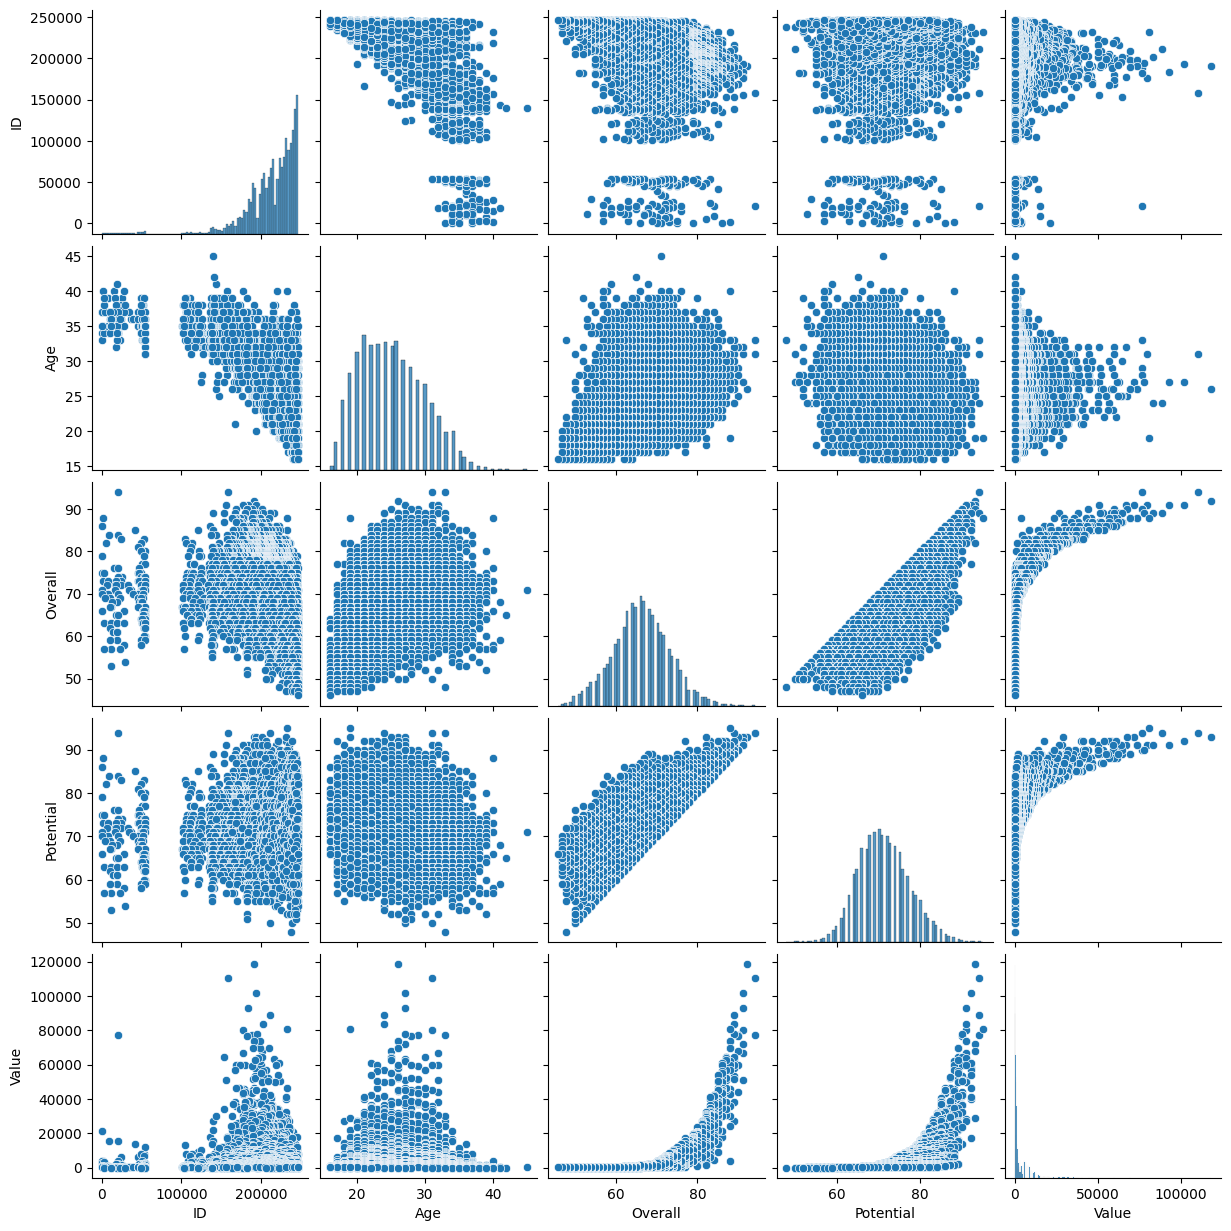

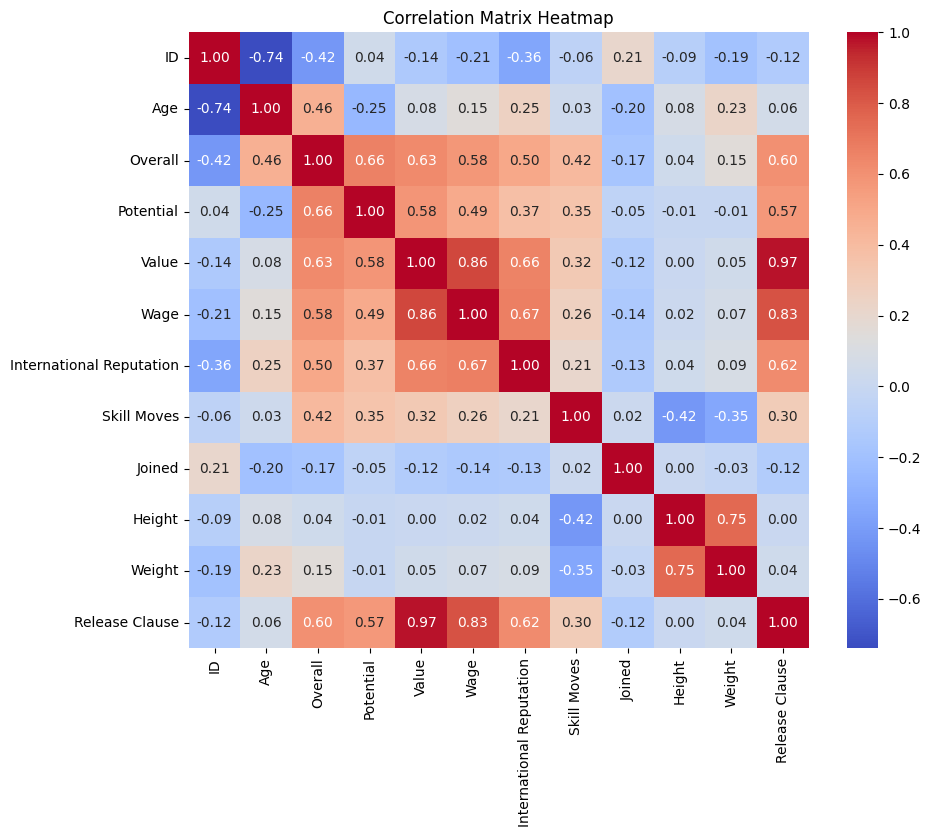

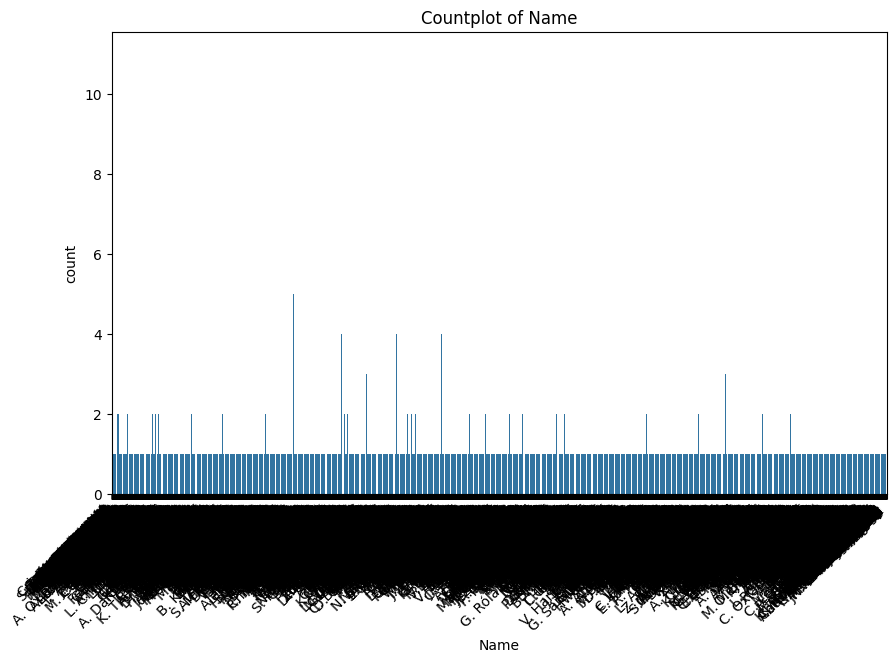

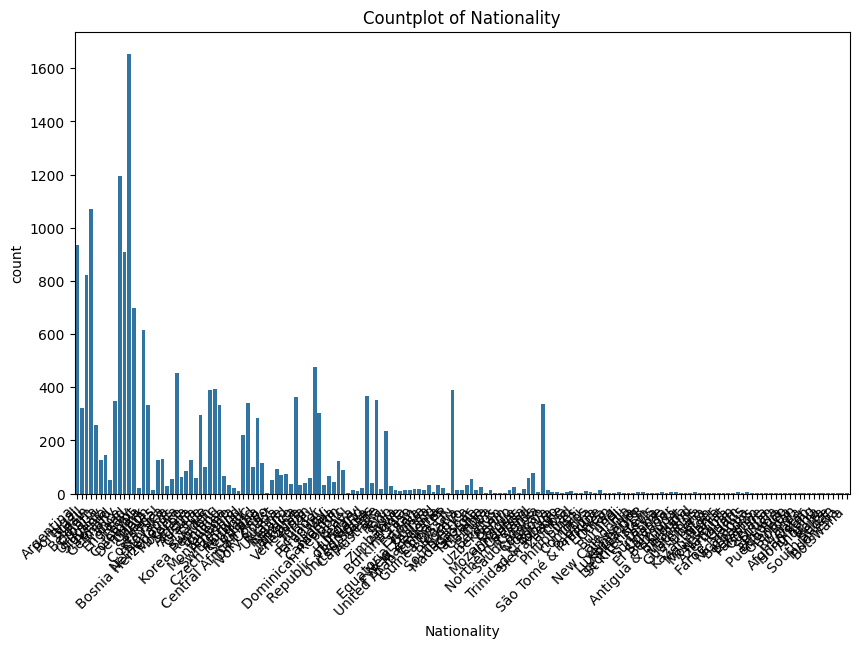

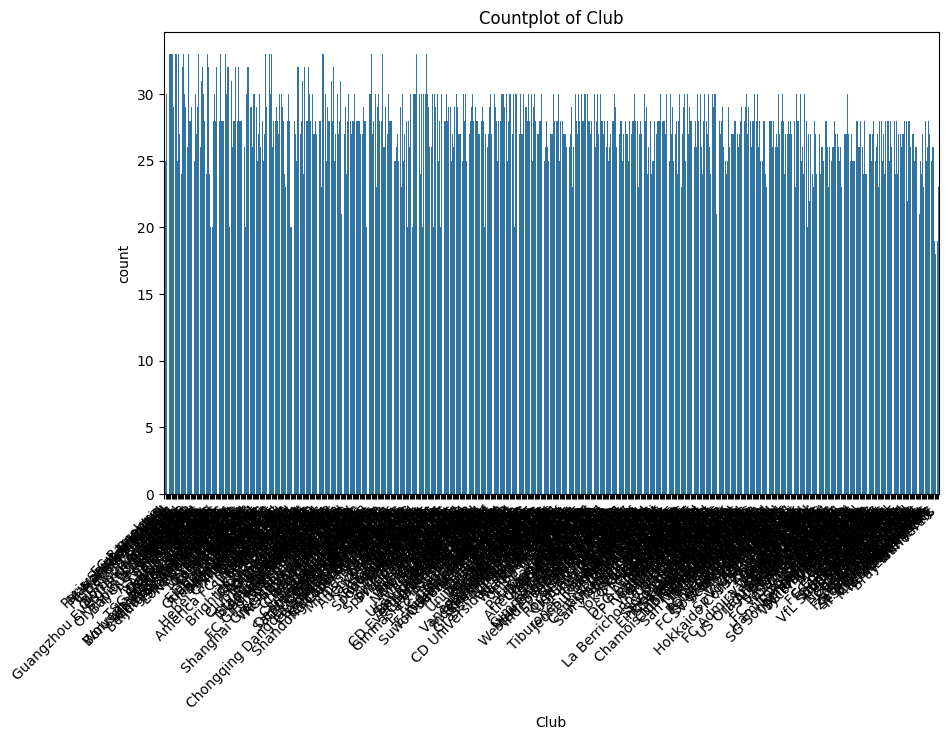

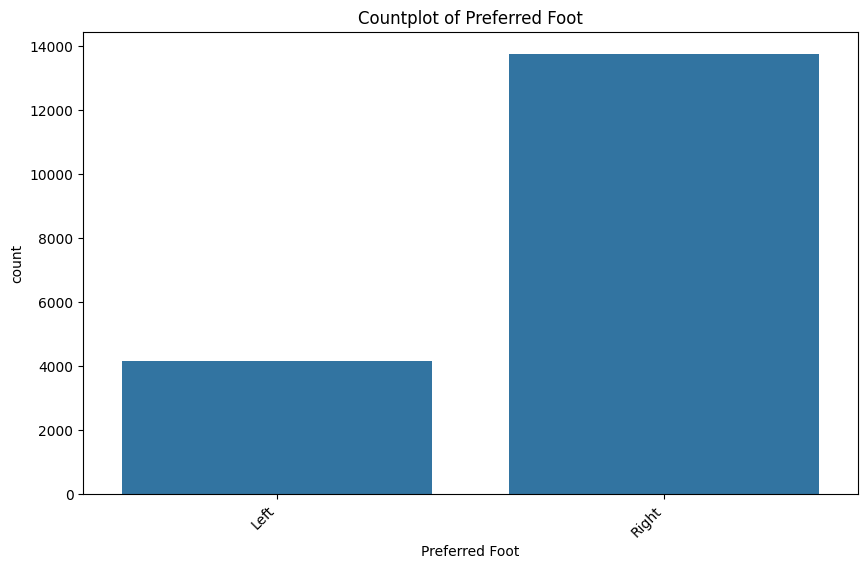

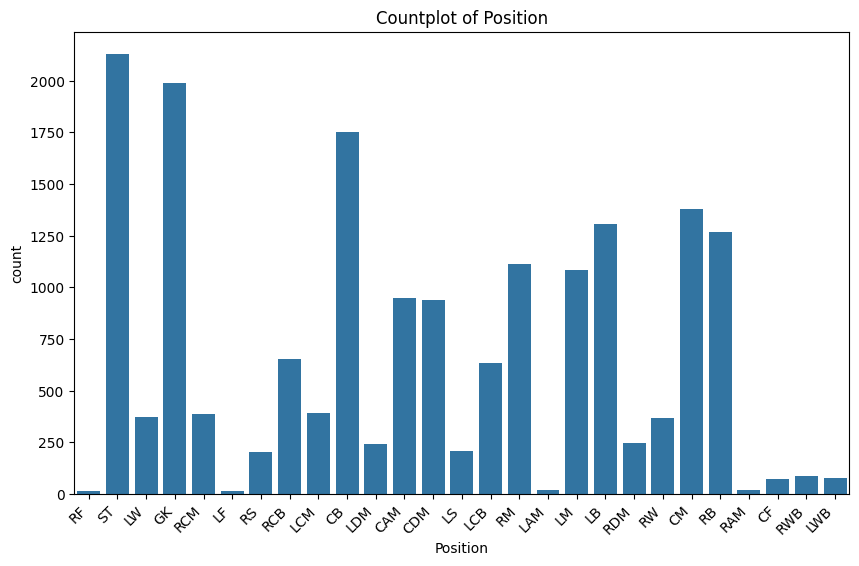

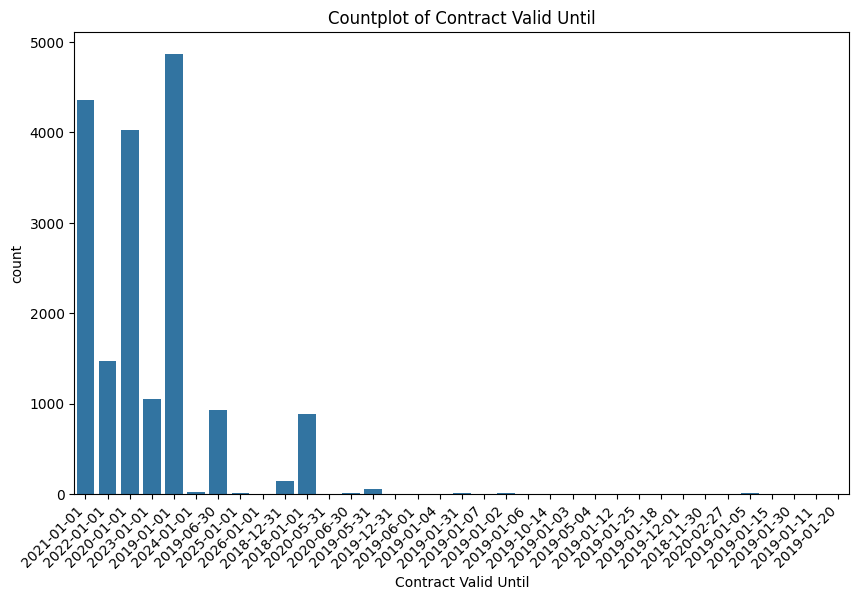

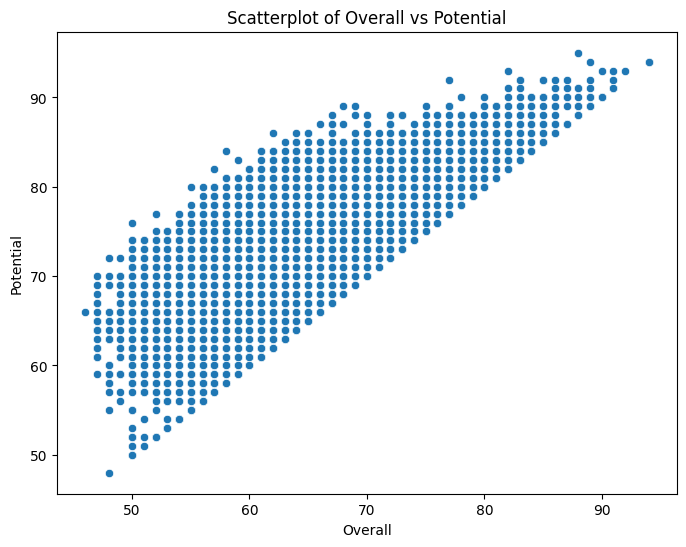

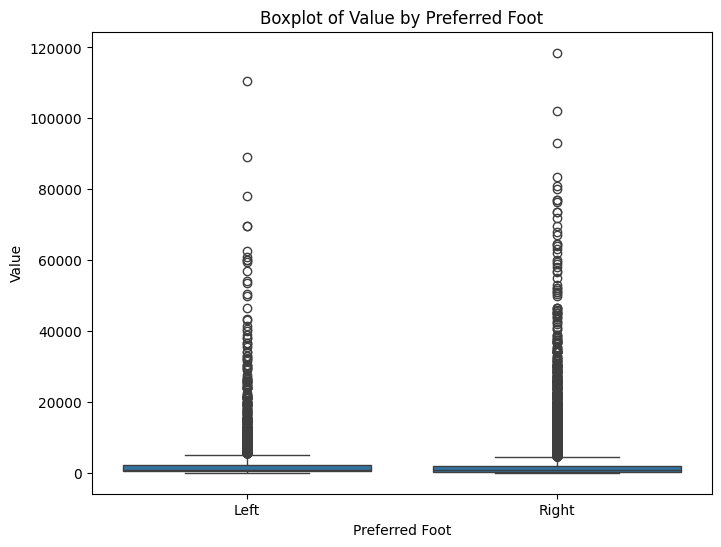

In [10]:
# prompt: remove all the error and visualized it again

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the CSV file is named 'fifa_eda.csv' and is in the same directory
# If it's in a different location, provide the full path

try:
    df = pd.read_csv('fifa_eda.csv')
except FileNotFoundError:
    print("Error: 'fifa_eda.csv' not found. Please ensure the file exists and the path is correct.")
    exit() # Exit the script if the file is not found
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check its format.")
    exit()
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    exit()


# Data Cleaning and Preprocessing
df.dropna(inplace=True) #Handling missing values
df.drop_duplicates(inplace=True) # Handling duplicates

# Now you can proceed with visualization
numerical_features = df.select_dtypes(include=np.number)
categorical_features = df.select_dtypes(include='object')


# Visualize distributions for numerical features
for col in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Visualize relationships between numerical features (pairplot)
if len(numerical_features.columns) > 0:
    sns.pairplot(df[numerical_features.columns[:5]]) # Limit to first 5 for clarity
    plt.show()

# Visualize correlation matrix
if len(numerical_features.columns) > 1:
  correlation_matrix = df[numerical_features.columns].corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation Matrix Heatmap')
  plt.show()

# Visualize countplots for categorical features
for col in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Example: Visualize the relationship between two specific features (replace with your column names)
# Replace 'feature1' and 'feature2' with actual column names from your dataframe
# Error handling to check if the columns exist

feature1 = 'Overall'
feature2 = 'Potential'

if feature1 in df.columns and feature2 in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=feature1, y=feature2, data=df)
    plt.title(f'Scatterplot of {feature1} vs {feature2}')
    plt.show()
else:
    print(f"Error: Column '{feature1}' or '{feature2}' not found in DataFrame.")

# Example box plot (replace 'CategoryColumn' and 'numerical_column' with appropriate column names)
# Add error handling to check for column existance

category_column = 'Preferred Foot'
numerical_column = 'Value'

if category_column in df.columns and numerical_column in df.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=category_column, y=numerical_column, data=df)
    plt.title(f'Boxplot of {numerical_column} by {category_column}')
    plt.show()
else:
    print(f"Error: Column '{category_column}' or '{numerical_column}' not found in DataFrame.")


In [3]:
# prompt: why we visualized the above data

# The code visualizes the data to understand its distribution, relationships between variables, and identify potential patterns or outliers.  Here's a breakdown of why each visualization is important:

# 1. **Histograms (for numerical features):**  These show the distribution of each numerical variable.  You can see if the data is normally distributed, skewed, or has multiple peaks. This helps understand the central tendency, spread, and potential outliers of each variable.

# 2. **Pair Plots:**  These show scatter plots of all pairs of numerical variables.  They help visualize the relationships *between* numerical features.  You can identify positive or negative correlations, clusters, and non-linear relationships.

# 3. **Correlation Matrix Heatmap:**  Provides a visual summary of the correlation coefficients between all pairs of numerical variables.  This helps quickly identify strong positive or negative correlations, which can be useful for feature selection or understanding relationships in the data.

# 4. **Scatter Plots (of specific features):**  Allow you to visualize the relationship between two specific variables of interest in more detail than a pairplot.

# 5. **Box Plots (numerical features grouped by a categorical feature):**  Show the distribution of a numerical variable for each category of a categorical variable. This is useful for comparing distributions across different groups.  You can easily see differences in median, quartiles, and the presence of outliers within each group.

# 6. **Count Plots (for categorical features):** Show the frequency of each category in a categorical variable.  They provide a quick overview of the distribution of categories.

# **In summary:**  These visualizations aid in exploratory data analysis (EDA) by giving a visual representation of the data's characteristics.  EDA helps to:

# * **Understand Data Distribution:** Identify the shape and spread of the data.
# * **Find Relationships:**  Discover correlations and dependencies between variables.
# * **Detect Outliers:**  Spot unusual data points that might need further investigation.
# * **Feature Engineering Ideas:** Suggest ways to transform or combine variables.
# * **Model Selection:**  Inform the choice of appropriate statistical models.

# Visualizations are crucial for making data-driven decisions and gaining insights from the data, which is why they are used extensively in EDA.

2. **Pair Plots:**  These show scatter plots of all pairs of numerical variables.  They help visualize the relationships *between* numerical features.  You can identify positive or negative correlations, clusters, and non-linear relationships.

3. **Correlation Matrix Heatmap:**  Provides a visual summary of the correlation coefficients between all pairs of numerical variables.  This helps quickly identify strong positive or negative correlations, which can be useful for feature selection or understanding relationships in the data.

4. **Scatter Plots (of specific features):**  Allow you to visualize the relationship between two specific variables of interest in more detail than a pairplot.

5. **Box Plots (numerical features grouped by a categorical feature):**  Show the distribution of a numerical variable for each category of a categorical variable. This is useful for comparing distributions across different groups.  You can easily see differences in median, quartiles, and the presence of outliers within each group.

6. **Count Plots (for categorical features):** Show the frequency of each category in a categorical variable.  They provide a quick overview of the distribution of categories.

**In summary:**  These visualizations aid in exploratory data analysis (EDA) by giving a visual representation of the data's characteristics.  EDA helps to:

* **Understand Data Distribution:** Identify the shape and spread of the data.
* **Find Relationships:**  Discover correlations and dependencies between variables.
* **Detect Outliers:**  Spot unusual data points that might need further investigation.
* **Feature Engineering Ideas:** Suggest ways to transform or combine variables.
* **Model Selection:**  Inform the choice of appropriate statistical models.

Visualizations are crucial for making data-driven decisions and gaining insights from the data, which is why they are used extensively in EDA.


SyntaxError: unterminated string literal (detected at line 37) (<ipython-input-3-33d018aff854>, line 37)

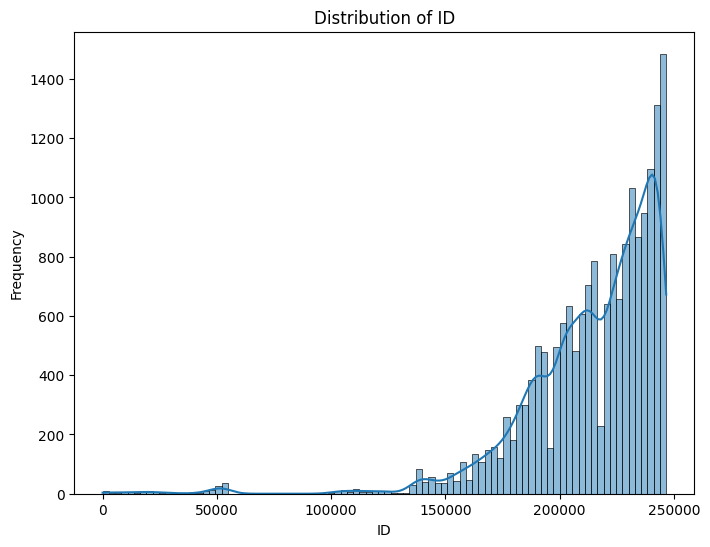

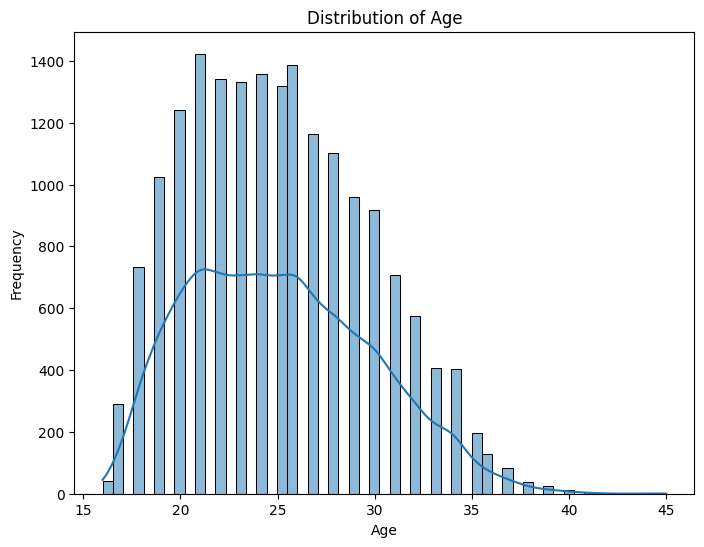

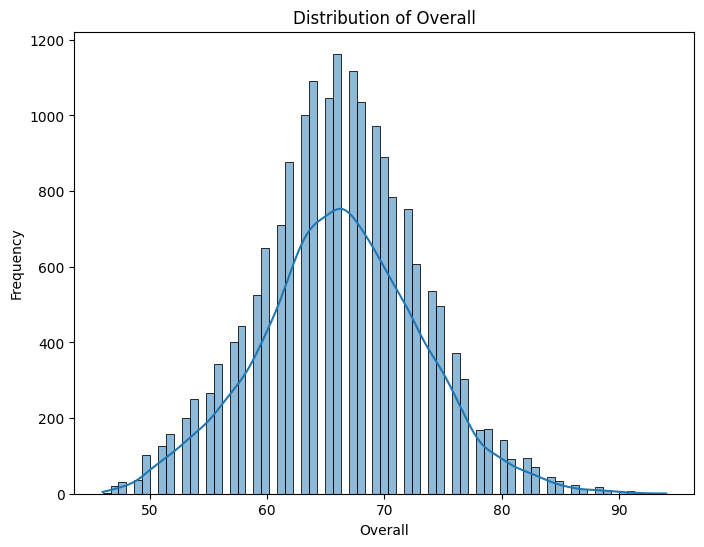

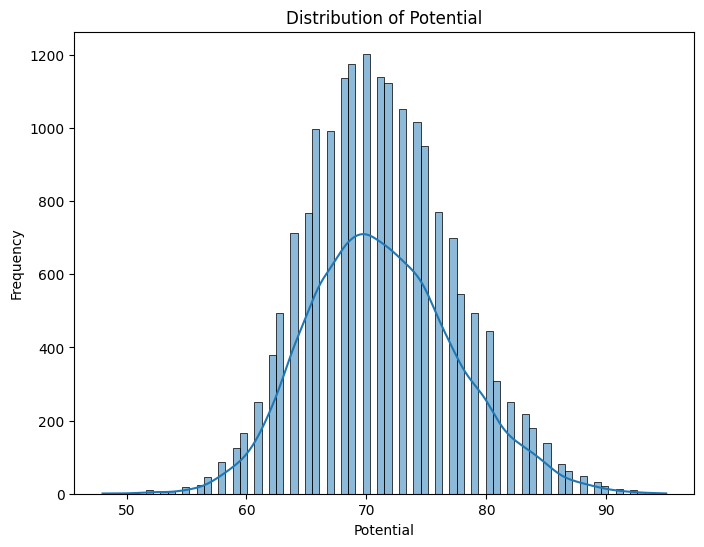

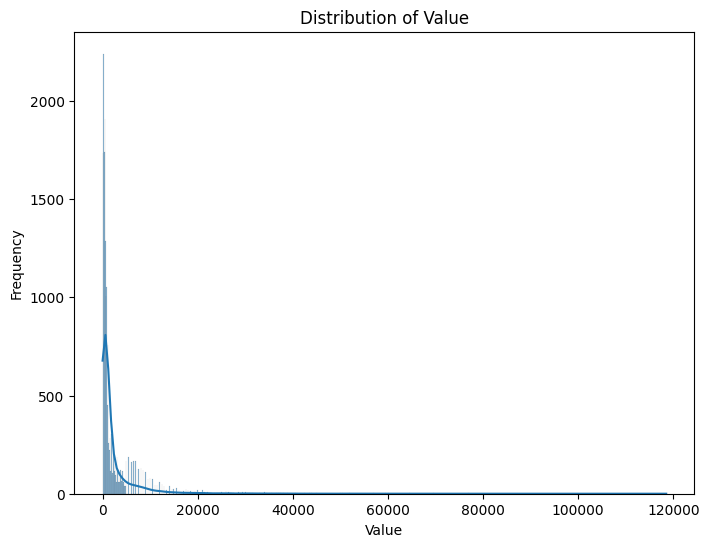

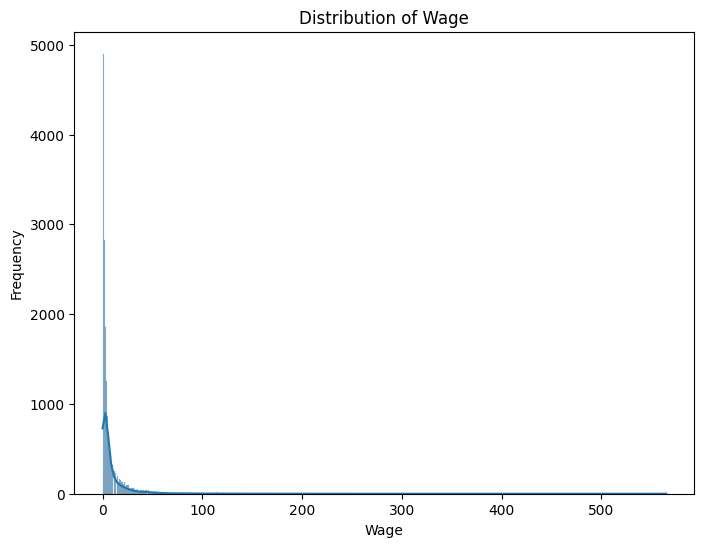

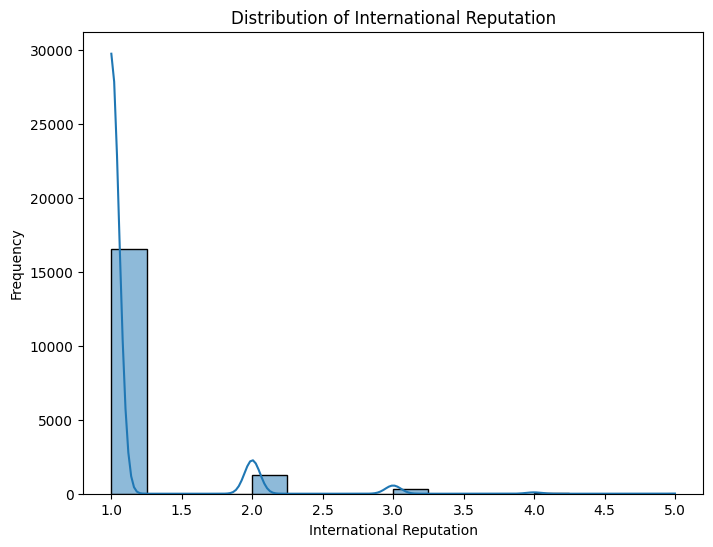

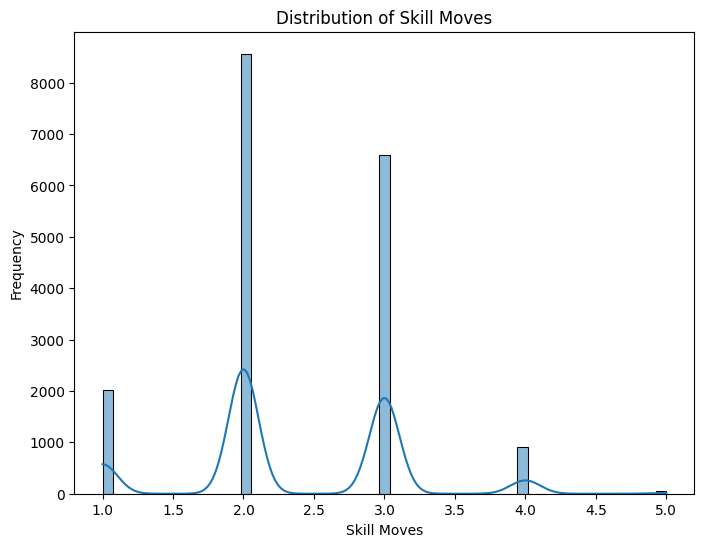

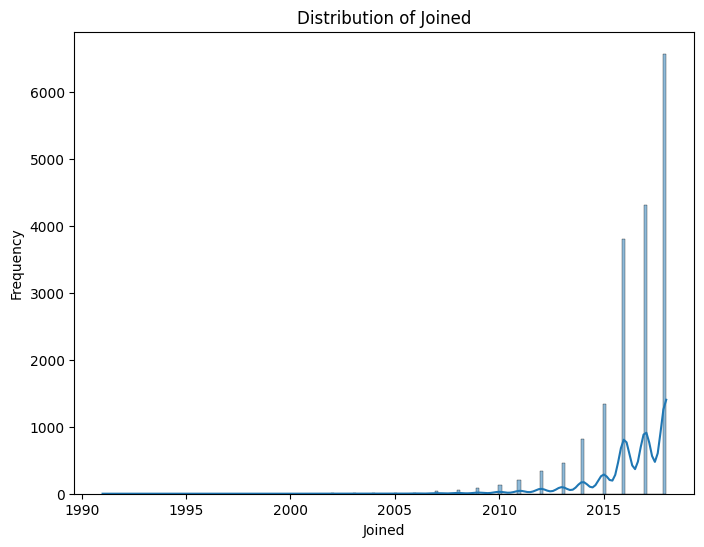

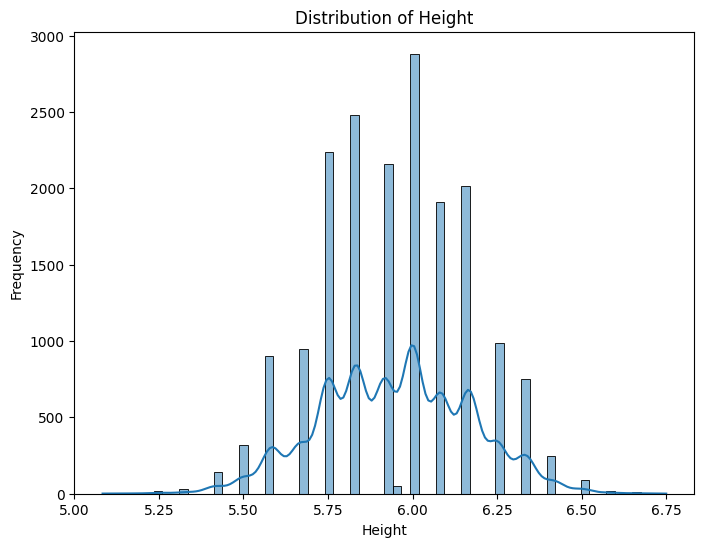

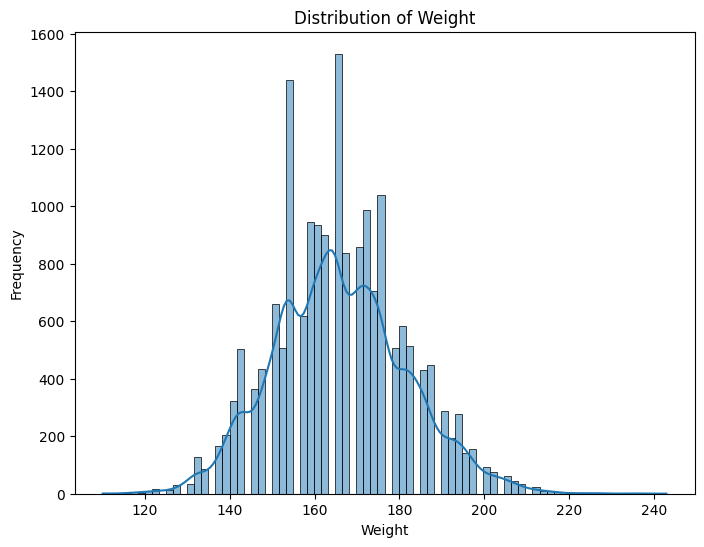

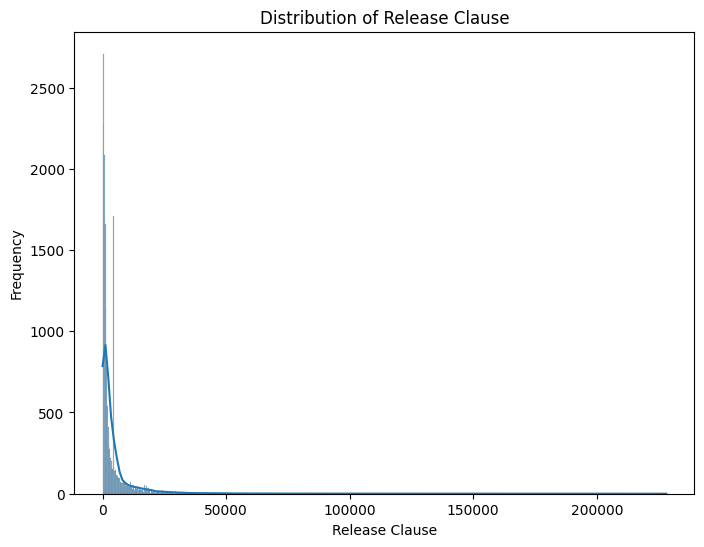

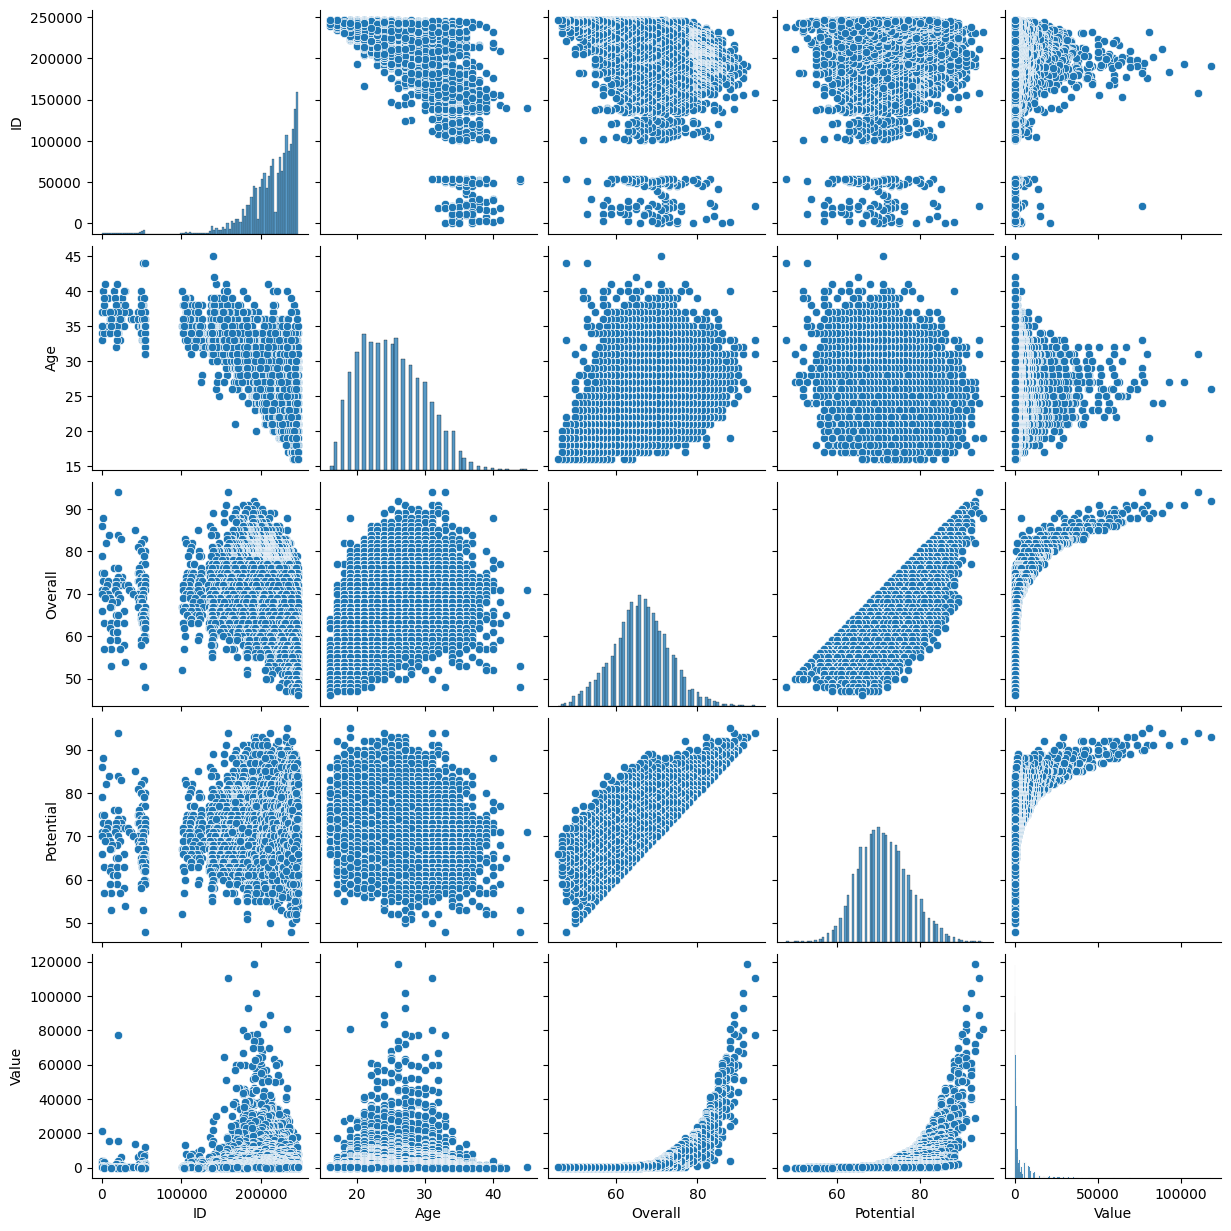

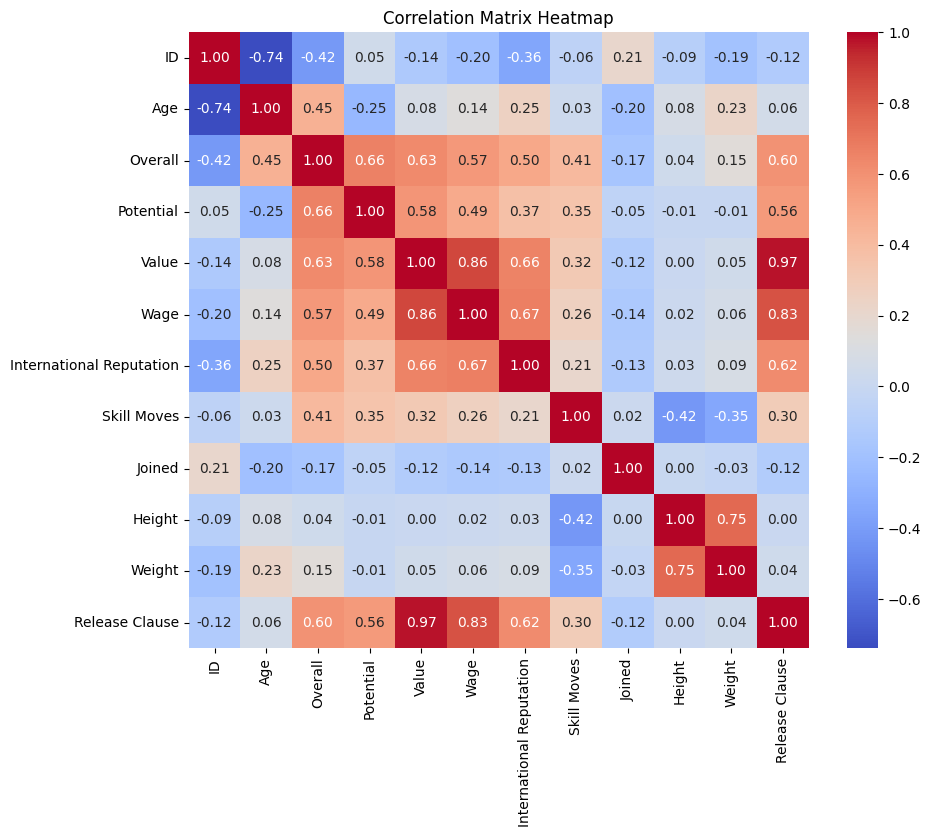

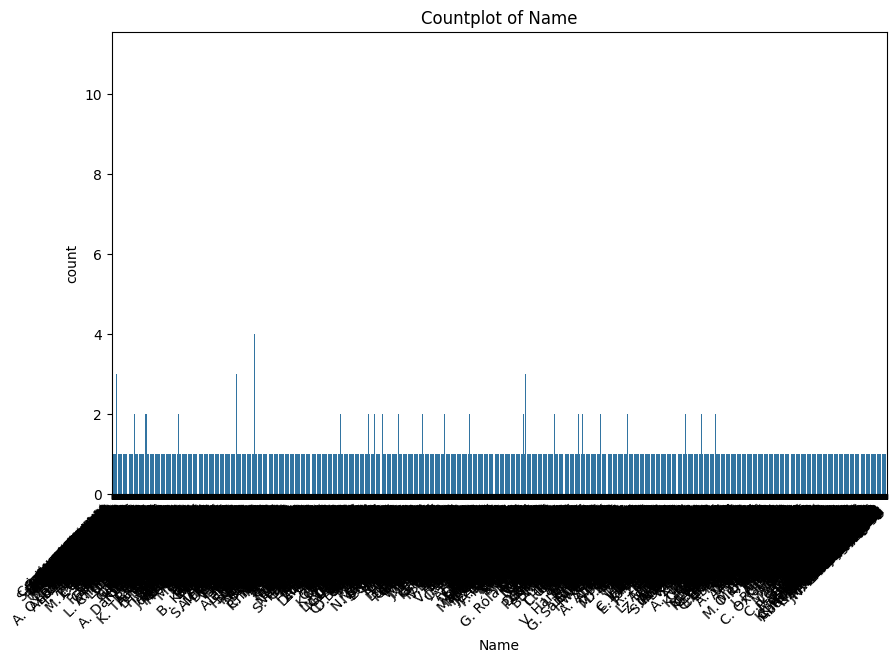

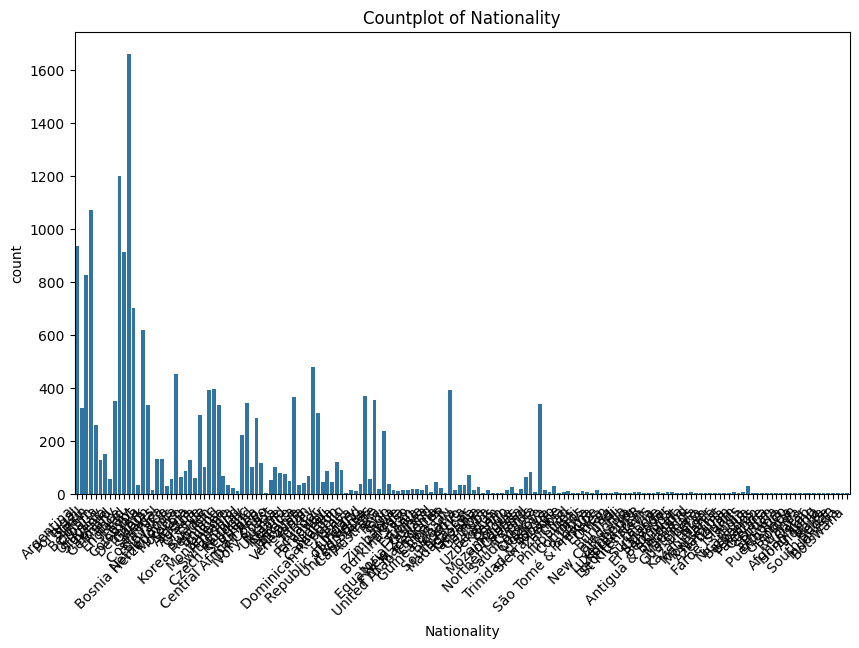

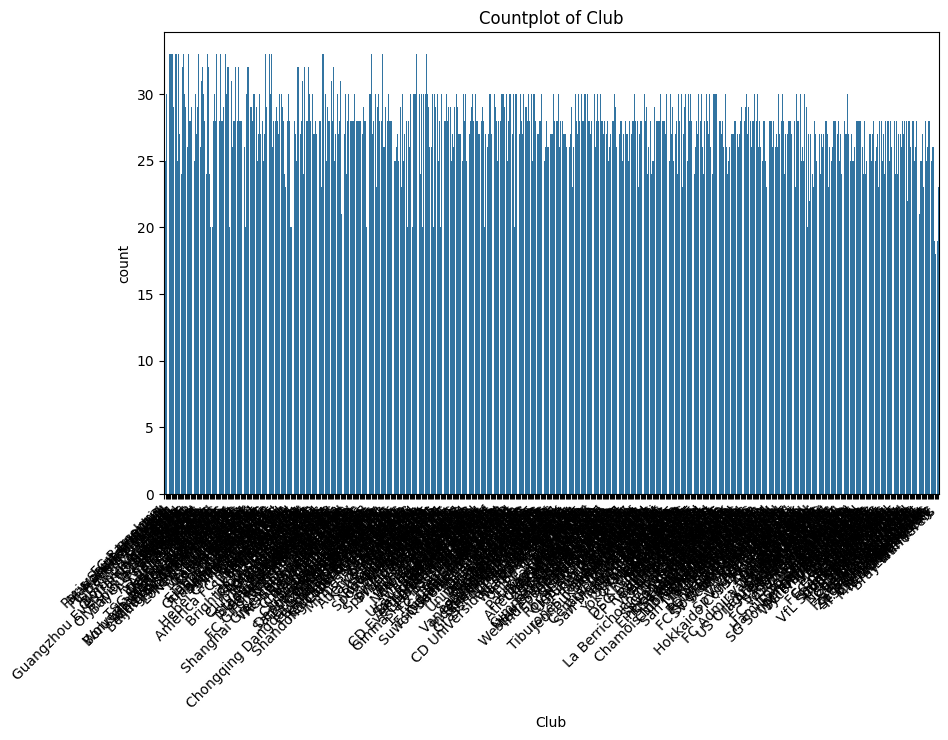

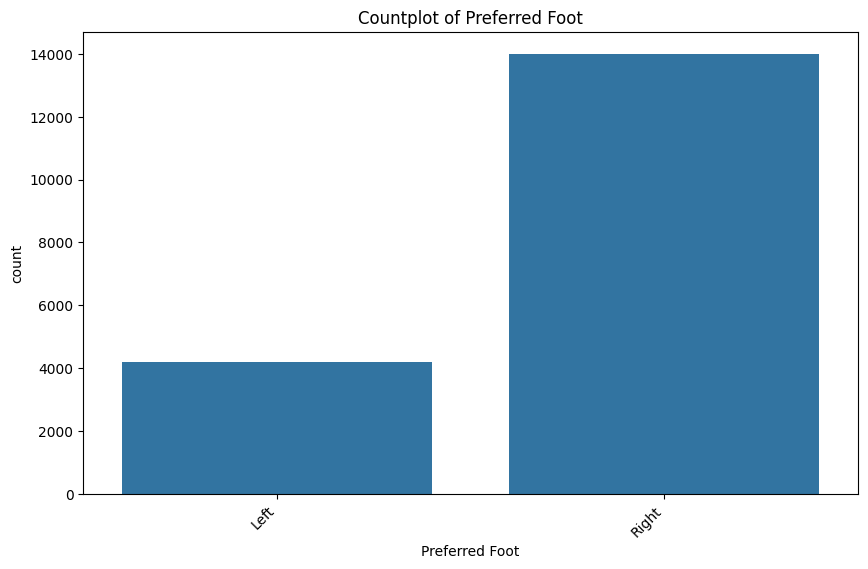

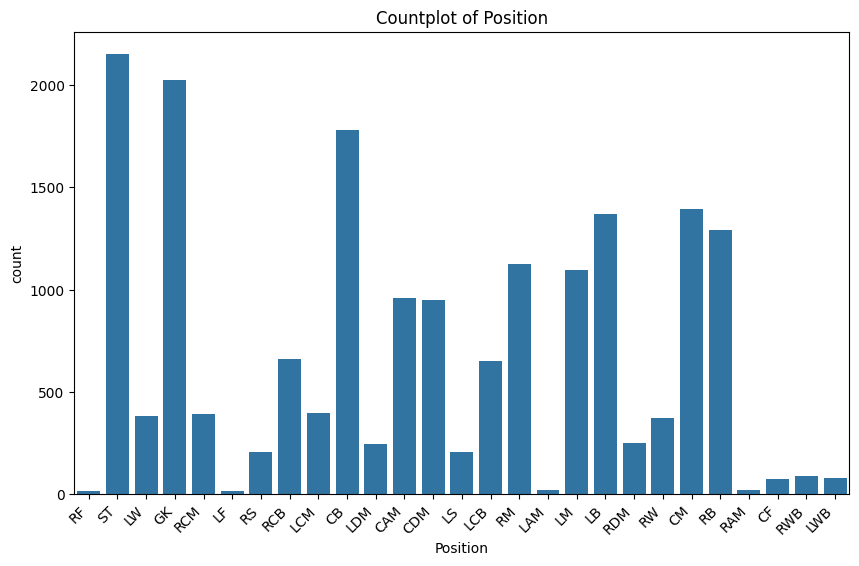

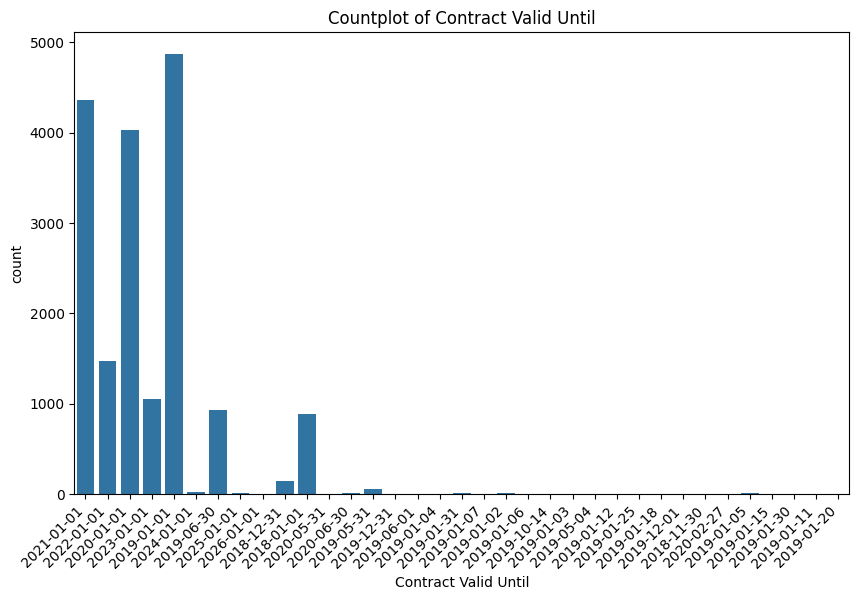

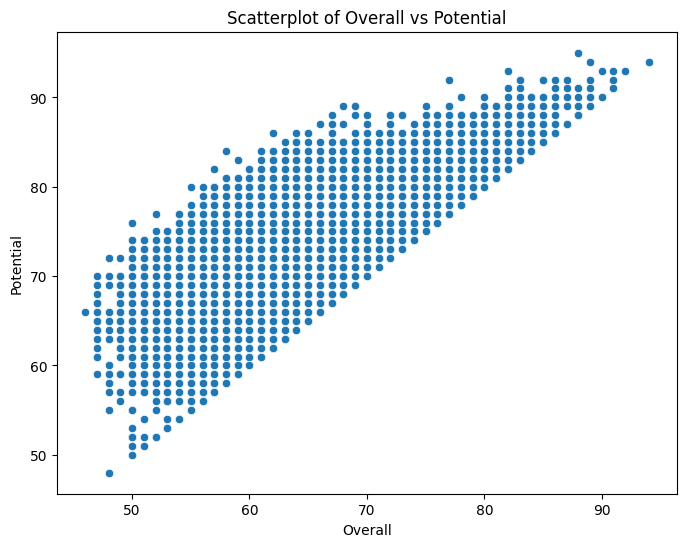

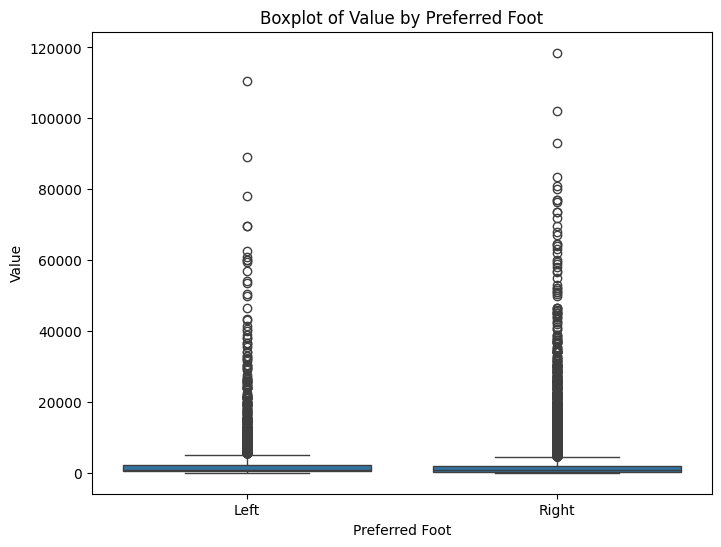

In [8]:
# prompt: generate the above data in advance form

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ... (rest of your existing code)

def visualize_data(df):
    """
    Generates visualizations for exploratory data analysis (EDA).

    Args:
        df: Pandas DataFrame containing the data.
    """

    numerical_features = df.select_dtypes(include=np.number)
    categorical_features = df.select_dtypes(include='object')


    # Histograms for numerical features
    for col in numerical_features.columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


    # Pair plots for numerical features (limit to first 5 for clarity)
    if len(numerical_features.columns) > 0:
        sns.pairplot(df[numerical_features.columns[:5]])
        plt.show()


    # Correlation matrix heatmap
    if len(numerical_features.columns) > 1:
        correlation_matrix = df[numerical_features.columns].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix Heatmap')
        plt.show()


    # Count plots for categorical features
    for col in categorical_features.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Countplot of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()


    # Example scatter plot (replace with your desired column names)
    def plot_scatter(feature1, feature2):
        if feature1 in df.columns and feature2 in df.columns:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=feature1, y=feature2, data=df)
            plt.title(f'Scatterplot of {feature1} vs {feature2}')
            plt.show()
        else:
            print(f"Error: Column '{feature1}' or '{feature2}' not found in DataFrame.")

    plot_scatter('Overall', 'Potential')  # Example usage


    # Example box plot
    def plot_boxplot(category_column, numerical_column):
        if category_column in df.columns and numerical_column in df.columns:
            plt.figure(figsize=(8,6))
            sns.boxplot(x=category_column, y=numerical_column, data=df)
            plt.title(f'Boxplot of {numerical_column} by {category_column}')
            plt.show()
        else:
            print(f"Error: Column '{category_column}' or '{numerical_column}' not found in DataFrame.")

    plot_boxplot('Preferred Foot', 'Value')

# ... (rest of your existing code, including reading the data)


# Call the visualize_data function
visualize_data(df)
